In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

#sns.set_style("darkgrid")

2 Plot distribution of the instances in each class and save the graphic in a file

In [2]:
numOffolds = len(os.listdir('BBC'))
print(numOffolds)
all_folds = os.listdir('BBC')
folder_path = all_folds[0]
print(folder_path)

len([x for x in os.listdir('BBC/'+folder_path)])


5
business


510

In [3]:
data_need = []
data_x = []
data_y = []


path = 'BBC/'
all_folds = os.listdir(path)

for i in range (len(all_folds)):
    data_x.append(all_folds[i])
    print(f'comput No.{i+1} folder.')
    folder_path = all_folds[i]
    NumOfFiles = len([x for x in os.listdir(path + folder_path)])
    data_y.append(NumOfFiles)
    print(f'No.{i+1} has {NumOfFiles} files.')
    table = pd.DataFrame({'folder_id': all_folds[i],'file_num':[NumOfFiles]})
    data_need.append(table)

        

comput No.1 folder.
No.1 has 510 files.
comput No.2 folder.
No.2 has 386 files.
comput No.3 folder.
No.3 has 417 files.
comput No.4 folder.
No.4 has 511 files.
comput No.5 folder.
No.5 has 401 files.


In [4]:
data_final = pd.concat(data_need, axis=0)
print(data_final)

       folder_id  file_num
0       business       510
0  entertainment       386
0       politics       417
0          sport       511
0           tech       401


['business' 'entertainment' 'politics' 'sport' 'tech']
[510 386 417 511 401]


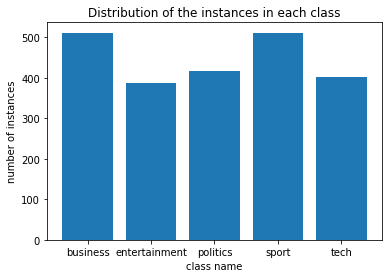

In [5]:
x_np = np.array(data_x)
print(x_np)
y_np = np.array(data_y)
print(y_np)
plt.title("Distribution of the instances in each class")
plt.xlabel("class name")
plt.ylabel("number of instances")
plt.bar(x_np,y_np)
plt.savefig('BBC-Distribution.pdf')
plt.show()

In [6]:
# use load_files to read the file structure and assign the category name to each file
corpus_data = load_files("BBC",encoding="latin1")
corpus_data_data = corpus_data.data
# print(corpus_data_data)
corpus_category = corpus_data.target
print(corpus_category)
corpus_category_names = corpus_data.target_names
print(corpus_category_names)


 


[0 4 2 ... 1 1 3]
['business', 'entertainment', 'politics', 'sport', 'tech']


In [7]:
print (corpus_category)
print(corpus_category_names)
print(corpus_data.filenames)

[0 4 2 ... 1 1 3]
['business', 'entertainment', 'politics', 'sport', 'tech']
['BBC\\business\\385.txt' 'BBC\\tech\\160.txt' 'BBC\\politics\\090.txt'
 ... 'BBC\\entertainment\\254.txt' 'BBC\\entertainment\\326.txt'
 'BBC\\sport\\341.txt']


4 Pre-process the dataset to have the features ready to be used

In [8]:
sample_text = ["One of the most basic ways we can numerically represent words "
               "is through the one-hot encoding method (also sometimes called "
               "count vectorizing)."]

vectorizer = CountVectorizer()
vectorizer.fit(sample_text)
print('Vocabulary: ')
print(vectorizer.vocabulary_)

Vocabulary: 
{'one': 12, 'of': 11, 'the': 15, 'most': 9, 'basic': 1, 'ways': 18, 'we': 19, 'can': 3, 'numerically': 10, 'represent': 13, 'words': 20, 'is': 7, 'through': 16, 'hot': 6, 'encoding': 5, 'method': 8, 'also': 0, 'sometimes': 14, 'called': 2, 'count': 4, 'vectorizing': 17}


In [10]:
vector = vectorizer.transform(sample_text)
print(vector)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	2
  (0, 13)	1
  (0, 14)	1
  (0, 15)	2
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1


In [11]:
print(vector.toarray())

[[1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1]]


In [12]:
#create a Vectorizer Object
vectorizer = CountVectorizer()
#tokenize and build vocab
vectorizer.fit(corpus_data_data)
#summarize
vocabulary_corpus = vectorizer.get_feature_names()
#print(vocabulary_corpus)
print(len(vectorizer.get_feature_names()))


# Encode the dataset to document-term matrix
vector = vectorizer.transform(corpus_data_data)
print(vector.shape)
print(vector.toarray().sum())#this sum for what to use?


29421
(2225, 29421)
836357


In [13]:
print('Hot vector: ')
print(vectorizer.transform(['hot']).toarray())
print('Hot and one: ')
print(vectorizer.transform(['hot', 'one']).toarray())
new_text = ['Today is the day that I do the thing today, today']
new_vectorizer = CountVectorizer()
print(new_vectorizer.fit_transform(new_text).toarray())

Hot vector: 
[[0 0 0 ... 0 0 0]]
Hot and one: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 1 1 2 1 3]]


In [14]:
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum())

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
9


5 Split the dataset int 80% for training 20% for testing

In [15]:
# split the dataset into 80% for training and 20% for testing
X = corpus_data_data
y = corpus_category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state= None)
#print(X_train)
#print(y_train)




In [17]:
# countVectorizer
vec = CountVectorizer()
# fit the vectorizer on the training dataset
vec.fit(X_train)
print(len(vec.get_feature_names()))
vocab = vec.get_feature_names()
# print(vocab)
X_train_transformed = vec.transform(X_train)
# print(X_train_transformed)
# convert training set to document-term matrix
X_train_feat = X_train_transformed.toarray()
# convert to sparse matrix for readability
pd.DataFrame(X_train_feat,columns= [vec.get_feature_names()])



26992


,00,000,0001,000bn,000m,000th,001,001and,001st,004,...,zoom,zooms,zooropa,zornotza,zorro,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1776,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1778,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# for test data
X_test_transformed = vec.transform(X_test)
# X_test_transformed
# print(X_test_transformed)
# convert testing set to document-term matrix
X_test_feat = X_test_transformed.toarray()
# convert to sparse matrix for readability
pd.DataFrame(X_test_feat, columns= [vec.get_feature_names()])


,00,000,0001,000bn,000m,000th,001,001and,001st,004,...,zoom,zooms,zooropa,zornotza,zorro,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


6 train a multinomial Naive Bayes Classifier on the training set using the default parameters and evaluate it on the test set

In [19]:
# multinomial Naive Bayes
print("--------------------------------MultinomialNB default values, try 1-----------------------------------")
nb = MultinomialNB(alpha=1)
# fit the training set using the default parameters and evaluate it on the test set
nb.fit(X_train_transformed, y_train)

# predict, Perform classification on an array of test vectors X.
y_pred_class = nb.predict(X_test_transformed)
# predict probabilities, Return probability estimates for the test vector X.
y_pred_proba = nb.predict_proba(X_test_transformed)

# b) confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ")
print(confusion)



# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ")
print(metrics.classification_report(y_test, y_pred_class))



# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ")
print("Accuracy score of the test set is : " + str(accuracy))

macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1))
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1))

# index = nb.predict(vec.transform(['Need to restart economy but with caution: Yogi Adityanath at E-Agenda AajTak']))

# def type_check(i):
#     if i == 0:
#         print('business')
#     elif i == 1:
#         print('entertainment')
#     elif i == 2:
#         print('politics')
#     elif i == 3:
#         print('sport')
#     elif i == 4:
#         print('tech')
# type_check(index)

--------------------------------MultinomialNB default values, try 1-----------------------------------
(b) the confusion matrix: 
[[93  0  0  0  4]
 [ 1 79  2  0  1]
 [ 0  0 89  0  0]
 [ 0  0  0 90  0]
 [ 0  0  3  0 83]]
(c) the precision, recall and F1-measure for each class of the test set : 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        97
           1       1.00      0.95      0.98        83
           2       0.95      1.00      0.97        89
           3       1.00      1.00      1.00        90
           4       0.94      0.97      0.95        86

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445

(d) the accuracy, macro-average F1 and weighted-average F1 of the model: 
Accuracy score of the test set is : 0.9752808988764045
Macro average F1 of the test set is : 0.9751662431276534
Weighted average F1 of the te

In [20]:
# e) the prior probability of each class
print("(e) the prior probability of each class : ")

sum = np.sum(y_np)
print(sum)
index = 0
for i in x_np:
    prior = y_np[index]/sum
    index = index + 1
    print(i + ': ' + str(prior))



(e) the prior probability of each class : 
2225
business: 0.2292134831460674
entertainment: 0.17348314606741572
politics: 0.18741573033707865
sport: 0.22966292134831462
tech: 0.1802247191011236


In [21]:
# f) the size of the vocabulary(the number of different words)
print("(f) the size of the vocabulary(the number of different words")
print(len(vocabulary_corpus))

(f) the size of the vocabulary(the number of different words
29421


In [22]:
# g) the number of word-tokens in each class
print("(g) the number of word-tokens in each class: ")
for class_name in corpus_category_names:
    # print(class_name)
    class_data = load_files("BBC", categories=class_name, encoding='latin1')
    class_data_data = class_data.data
    class_vec = CountVectorizer()
    class_array = class_vec.fit_transform(class_data_data).toarray()
    sum_class = class_array.sum()

    
    print("The number of word-tokens in " + class_name + ": " + str(sum_class))
    


(g) the number of word-tokens in each class: 
The number of word-tokens in business: 164663
The number of word-tokens in entertainment: 124893
The number of word-tokens in politics: 185208
The number of word-tokens in sport: 162953
The number of word-tokens in tech: 198640


In [23]:
# h) the number of word-tokens in the entire corpus
print('(h) the number of word-tokens in the entire corpus: ')
sum_total = vector.toarray().sum() 
print("Total word-tokens in entire corpus: " + str(sum_total))

# j) the number and percentage of words with a frequency of 1 in the entire corpus
print('(j) the number and percentage of words with a frequency of 1 in the entire corpus: ')
count_word = 0
for word in (vector.toarray().sum(axis = 0)):
    if word == 1:
        count_word = count_word + 1
print("The number of words with a frequency of 1 in entire corpus: " + str(count_word))
print("The percentage of words with a frequency of 1 in entire corpus: " + str(count_word/sum_total))

(h) the number of word-tokens in the entire corpus: 
Total word-tokens in entire corpus: 836357
(j) the number and percentage of words with a frequency of 1 in the entire corpus: 
The number of words with a frequency of 1 in entire corpus: 10005
The percentage of words with a frequency of 1 in entire corpus: 0.01196259492059013


In [33]:
# i) the number and percentage of words with freuency of zero in each class
print('(i) the number and percentage of words with freuency of zero in each class: ')
for class_name in corpus_category_names:
    # print(class_name)
    class_data = load_files("BBC", categories=class_name, encoding='latin1')
    class_data_data = class_data.data
    class_vec = CountVectorizer()
    class_vec.fit(class_data_data)
    num_feat_word = len(class_vec.get_feature_names())
    num_zero = len(vocabulary_corpus)-num_feat_word
    print("The number of words with frequency of zero in " + class_name + ": "+ str(num_zero))
    print("The percentage of words with frequency of zero in " + class_name + ": "+ str(num_zero/len(vocabulary_corpus)))


(i) the number and percentage of words with freuency of zero in each class: 
The number of words with frequency of zero in business: 17538
The percentage of words with frequency of zero in business: 0.5961048230855511
The number of words with frequency of zero in entertainment: 17746
The percentage of words with frequency of zero in entertainment: 0.6031746031746031
The number of words with frequency of zero in politics: 18201
The percentage of words with frequency of zero in politics: 0.6186397471194045
The number of words with frequency of zero in sport: 18850
The percentage of words with frequency of zero in sport: 0.6406988205703409
The number of words with frequency of zero in tech: 17323
The percentage of words with frequency of zero in tech: 0.5887971177050406


In [24]:

counts = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
print("(k) 2 favoirite words and their log-prob")
# counts
# show the top 10 most common words
# print(counts.T.sort_values(by=0, ascending=False).head(10))
import math
count_love = counts['love'].sum()
print("frequency of 'love': " + str(count_love))
log_prob_love = math.log(count_love/sum_total)
print("the log-prob of the 'love' favorite word is: " + str(log_prob_love))
count_key = counts['key'].sum()
print("frequency of 'key': " + str(count_key))
log_prob_key = math.log(count_key/sum_total)
print("the log-prob of the 'key' favorite word is: " + str(log_prob_key))


(k) 2 favoirite words and their log-prob
frequency of 'love': 151
the log-prob of the 'love' favorite word is: -8.619530997591884
frequency of 'key': 245
the log-prob of the 'key' favorite word is: -8.135552623862083


# 8. Redo steps 6 and 7 without changing anything (do not redo step 5, the dataset split). Change the model name to something like \MultinomialNB default values, try 2" and append the results to the  tle  bbc-performance.txt.




In [36]:
# multinomial Naive Bayes
print("--------------------------------MultinomialNB default values, try 2-----------------------------------")
nb = MultinomialNB(alpha=2)
# fit the training set using the default parameters and evaluate it on the test set
nb.fit(X_train_transformed, y_train)

# predict, Perform classification on an array of test vectors X.
y_pred_class = nb.predict(X_test_transformed)
# predict probabilities, Return probability estimates for the test vector X.
y_pred_proba = nb.predict_proba(X_test_transformed)

# b) confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ")
print(confusion)



# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ")
print(metrics.classification_report(y_test, y_pred_class))



# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ")
print("Accuracy score of the test set is : " + str(accuracy))

macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1))
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1))

# index = nb.predict(vec.transform(['Need to restart economy but with caution: Yogi Adityanath at E-Agenda AajTak']))

# def type_check(i):
#     if i == 0:
#         print('business')
#     elif i == 1:
#         print('entertainment')
#     elif i == 2:
#         print('politics')
#     elif i == 3:
#         print('sport')
#     elif i == 4:
#         print('tech')
# type_check(index)

--------------------------------MultinomialNB default values, try 2-----------------------------------
(b) the confusion matrix: 
[[ 77   0   3   0   3]
 [  0  77   1   0   2]
 [  1   0  88   0   0]
 [  0   0   0 112   0]
 [  0   1   0   0  80]]
(c) the precision, recall and F1-measure for each class of the test set : 
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        83
           1       0.99      0.96      0.97        80
           2       0.96      0.99      0.97        89
           3       1.00      1.00      1.00       112
           4       0.94      0.99      0.96        81

    accuracy                           0.98       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.98      0.98      0.98       445

(d) the accuracy, macro-average F1 and weighted-average F1 of the model: 
Accuracy score of the test set is : 0.9752808988764045
Macro average F1 of the test set is : 0.9734872791457427
Weig

In [26]:
#E) The prior probability of each class
print("(e)the prior probility of each class :")

sum=np.sum(y_np)
print(sum)
#print(y_np[0])
index=0
for i in x_np:
    prior=y_np[index]/sum
    index=index+1
    print(i+':'+str(prior))

(e)the prior probility of each class :
2225
business:0.2292134831460674
entertainment:0.17348314606741572
politics:0.18741573033707865
sport:0.22966292134831462
tech:0.1802247191011236


In [42]:
#f) the size of the vocabulary(the number of  different words)
v=len(vocabulary_corpus)
print("(f) the size of the vocabulary(the number of different words)")
print(v)

(f) the size of the vocabulary(the number of different words)
29421


In [44]:
#g)the number of word-tokens in each class
print("(g)the number of word-tokens in each class:")
for class_name in corpus_category_names:
    #print(class name)
    class_data=load_files("BBC",categories=class_name,encoding='latin1')
    class_data_data=class_data.data
    class_vec=CountVectorizer()
    class_array=class_vec.fit_transform(class_data_data).toarray()
    sum_class=class_array.sum()+2*v
    
    print("The number of word-tokens in  "+class_name+":"+str(sum_class))

(g)the number of word-tokens in each class:
The number of word-tokens in  business:223505
The number of word-tokens in  entertainment:183735
The number of word-tokens in  politics:244050
The number of word-tokens in  sport:221795
The number of word-tokens in  tech:257482


In [49]:
#h)the number of word-token in the entir corpus
print("(h)the number of word-tokens in the entire corpus:")
sum_total=vector.toarray().sum()+2*v

print("Total word-tokens in entire corpus:"+str(sum_total))# add 2*v

#j)the number and percentage of words with a frequecny of 1 in the entire corpus
print('(j) the number and percentage of words with a frequency of 1 in the entire corpus:')
cout_word=0
#for word in (vector.toarray().sum(axis=0)):#axis=0 sum the column number
    #if word==1:
        #count_word=count_word+1
        
print("The number of words with a frequency of 1 in entire corpus: "+ str(cout_word))
p=cout_word/sum_total

print("The percentage of words with a frequency of 1 in entire corpus :"+str(p))


(h)the number of word-tokens in the entire corpus:
Total word-tokens in entire corpus:895199
(j) the number and percentage of words with a frequency of 1 in the entire corpus:
The number of words with a frequency of 1 in entire corpus: 0
The percentage of words with a frequency of 1 in entire corpus :0.0


In [54]:
# i)the number and percentage of words with frequency of zero in each class
print("(i)the number and percentage of words with freuency of zero in each class:")
for class_name in corpus_category_names:
    #print(class_name)
    class_data=load_files("BBC",categories=class_name,encoding='latin1')
    class_data_data=class_data.data
    class_vec=CountVectorizer()
    class_vec.fit(class_data.data)
    num_feat_word=len(class_vec.get_feature_names())
    num_zero=len(vocabulary_corpus)-num_feat_word ###why?
    print("The number of words with frequency of zero in "+class_name+":"+str(num_zero-num_zero))
    print("The percentage of words with frequency of zero in "+class_name+":"+str((num_zero-num_zero)/len(vocabulary_corpus)))

(i)the number and percentage of words with freuency of zero in each class:
The number of words with frequency of zero in business:0
The percentage of words with frequency of zero in business:0.0
The number of words with frequency of zero in entertainment:0
The percentage of words with frequency of zero in entertainment:0.0
The number of words with frequency of zero in politics:0
The percentage of words with frequency of zero in politics:0.0
The number of words with frequency of zero in sport:0
The percentage of words with frequency of zero in sport:0.0
The number of words with frequency of zero in tech:0
The percentage of words with frequency of zero in tech:0.0


In [59]:
# k)Two favorite words and theri log-prob
counts=pd.DataFrame(vector.toarray(),columns=vectorizer.get_feature_names())
print("(k) 2 favorite words and their log-prob")
#counts
#show the top 10 most common words
#print(counts.T.sort_values(by=0,ascending=False).head(10))
import math
count_love=counts['love'].sum()
count_love_smooth=count_love+2
print("frequency of 'love':"+ str(count_love_smooth))
#print(sum_total)
sum_total_smooth=sum_total+2*v
#print(sum_total_smooth)
log_prob_love=math.log(count_love_smooth/sum_total_smooth)
print("The log-prob of the 'love' favorite word is :"+ str(log_prob_love))
count_key=counts['key'].sum()
count_key_smooth=count_key+2
print("frequency of 'key':"+str(count_key_smooth))
log_prob_key=math.log(count_key_smooth/sum_total_smooth)
print("The log-prob of the 'key'favorite word is :"+str(log_prob_free))


(k) 2 favorite words and their log-prob
frequency of 'love':153
The log-prob of the 'love' favorite word is :-8.73802400505371
frequency of 'key':247
The log-prob of the 'key'favorite word is :-8.04209945480497


# 9. Redo steps 6 and 7 again, but this time, change the smoothing value to 0.0001. Append the results at the end of bbc-performance.txt.


In [37]:
# multinomial Naive Bayes
print("--------------------------------MultinomialNB default values, try 0.0001-----------------------------------")
nb = MultinomialNB(alpha=0.0001)
# fit the training set using the default parameters and evaluate it on the test set
nb.fit(X_train_transformed, y_train)

# predict, Perform classification on an array of test vectors X.
y_pred_class = nb.predict(X_test_transformed)
# predict probabilities, Return probability estimates for the test vector X.
y_pred_proba = nb.predict_proba(X_test_transformed)

# b) confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ")
print(confusion)



# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ")
print(metrics.classification_report(y_test, y_pred_class))



# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ")
print("Accuracy score of the test set is : " + str(accuracy))

macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1))
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1))

# index = nb.predict(vec.transform(['Need to restart economy but with caution: Yogi Adityanath at E-Agenda AajTak']))

# def type_check(i):
#     if i == 0:
#         print('business')
#     elif i == 1:
#         print('entertainment')
#     elif i == 2:
#         print('politics')
#     elif i == 3:
#         print('sport')
#     elif i == 4:
#         print('tech')
# type_check(index)

--------------------------------MultinomialNB default values, try 0.0001-----------------------------------
(b) the confusion matrix: 
[[ 75   0   3   0   5]
 [  0  77   2   0   1]
 [  3   0  86   0   0]
 [  0   0   0 112   0]
 [  2   2   0   0  77]]
(c) the precision, recall and F1-measure for each class of the test set : 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        83
           1       0.97      0.96      0.97        80
           2       0.95      0.97      0.96        89
           3       1.00      1.00      1.00       112
           4       0.93      0.95      0.94        81

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445

(d) the accuracy, macro-average F1 and weighted-average F1 of the model: 
Accuracy score of the test set is : 0.9595505617977528
Macro average F1 of the test set is : 0.9566757607383922

In [60]:
#E) The prior probability of each class
print("(e)the prior probility of each class :")

sum=np.sum(y_np)
print(sum)
#print(y_np[0])
index=0
for i in x_np:
    prior=y_np[index]/sum
    index=index+1
    print(i+':'+str(prior))

(e)the prior probility of each class :
2225
business:0.2292134831460674
entertainment:0.17348314606741572
politics:0.18741573033707865
sport:0.22966292134831462
tech:0.1802247191011236


In [61]:
#f) the size of the vocabulary(the number of  different words)
v=len(vocabulary_corpus)
print("(f) the size of the vocabulary(the number of different words)")
print(v)

(f) the size of the vocabulary(the number of different words)
29421


In [62]:
#g)the number of word-tokens in each class
print("(g)the number of word-tokens in each class:")
for class_name in corpus_category_names:
    #print(class name)
    class_data=load_files("BBC",categories=class_name,encoding='latin1')
    class_data_data=class_data.data
    class_vec=CountVectorizer()
    class_array=class_vec.fit_transform(class_data_data).toarray()
    sum_class=class_array.sum()+0.0001*v
    
    print("The number of word-tokens in  "+class_name+":"+str(sum_class))

(g)the number of word-tokens in each class:
The number of word-tokens in  business:164665.9421
The number of word-tokens in  entertainment:124895.9421
The number of word-tokens in  politics:185210.9421
The number of word-tokens in  sport:162955.9421
The number of word-tokens in  tech:198642.9421


In [65]:
#h)the number of word-token in the entir corpus
print("(h)the number of word-tokens in the entire corpus:")
sum_total=vector.toarray().sum()+0.0001*v

print("Total word-tokens in entire corpus:"+str(sum_total))# add 2*v

#j)the number and percentage of words with a frequecny of 1 in the entire corpus
print('(j) the number and percentage of words with a frequency of 1 in the entire corpus:')
cout_word=0
#for word in (vector.toarray().sum(axis=0)):#axis=0 sum the column number
    #if word==1:
        #count_word=count_word+1
        
print("The number of words with a frequency of 1 in entire corpus: "+ str(cout_word))
p=cout_word/sum_total

print("The percentage of words with a frequency of 1 in entire corpus :"+str(p))

(h)the number of word-tokens in the entire corpus:
Total word-tokens in entire corpus:836359.9421
(j) the number and percentage of words with a frequency of 1 in the entire corpus:
The number of words with a frequency of 1 in entire corpus: 0
The percentage of words with a frequency of 1 in entire corpus :0.0


In [66]:
# i)the number and percentage of words with frequency of zero in each class
print("(i)the number and percentage of words with freuency of zero in each class:")
for class_name in corpus_category_names:
    #print(class_name)
    class_data=load_files("BBC",categories=class_name,encoding='latin1')
    class_data_data=class_data.data
    class_vec=CountVectorizer()
    class_vec.fit(class_data.data)
    num_feat_word=len(class_vec.get_feature_names())
    num_zero=len(vocabulary_corpus)-num_feat_word ###why?
    print("The number of words with frequency of zero in "+class_name+":"+str(num_zero-num_zero))
    print("The percentage of words with frequency of zero in "+class_name+":"+str((num_zero-num_zero)/len(vocabulary_corpus)))

(i)the number and percentage of words with freuency of zero in each class:
The number of words with frequency of zero in business:0
The percentage of words with frequency of zero in business:0.0
The number of words with frequency of zero in entertainment:0
The percentage of words with frequency of zero in entertainment:0.0
The number of words with frequency of zero in politics:0
The percentage of words with frequency of zero in politics:0.0
The number of words with frequency of zero in sport:0
The percentage of words with frequency of zero in sport:0.0
The number of words with frequency of zero in tech:0
The percentage of words with frequency of zero in tech:0.0


In [67]:
# k)Two favorite words and theri log-prob
counts=pd.DataFrame(vector.toarray(),columns=vectorizer.get_feature_names())
print("(k) 2 favorite words and their log-prob")
#counts
#show the top 10 most common words
#print(counts.T.sort_values(by=0,ascending=False).head(10))
import math
count_love=counts['love'].sum()
count_love_smooth=count_love+0.0001
print("frequency of 'love':"+ str(count_love_smooth))
#print(sum_total)
sum_total_smooth=sum_total+0.0001*v
#print(sum_total_smooth)
log_prob_love=math.log(count_love_smooth/sum_total_smooth)
print("The log-prob of the 'love' favorite word is :"+ str(log_prob_love))
count_key=counts['key'].sum()
count_key_smooth=count_key+0.0001
print("frequency of 'key':"+str(count_key_smooth))
log_prob_key=math.log(count_key_smooth/sum_total_smooth)
print("The log-prob of the 'key'favorite word is :"+str(log_prob_free))


(k) 2 favorite words and their log-prob
frequency of 'love':151.0001
The log-prob of the 'love' favorite word is :-8.619537370828047
frequency of 'key':245.0001
The log-prob of the 'key'favorite word is :-8.04209945480497
